In [1]:
from PIL import Image
import os, os.path
import matplotlib.pyplot as plt
import PIL, PIL.ImageOps, PIL.ImageEnhance, PIL.ImageDraw
import cv2
import numpy as np
import tensorflow as tf
from keras import layers
import keras
from imgaug import augmenters as iaa  # Assuming you have imgaug installed (pip install imgaug)
import random

d:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
dir="C:\\Users\\ASUS\\Downloads\\Data_Agument"
classes=[clas.name for clas in os.scandir(dir) if clas.is_dir()]

X,y=[],[]
for clas in classes:
    path=os.path.join(dir,clas)
    for img in os.listdir(path):
        X.append(plt.imread(os.path.join(path,img)))
        y.append(str(clas))

['Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arctic_Fox', 'Arct

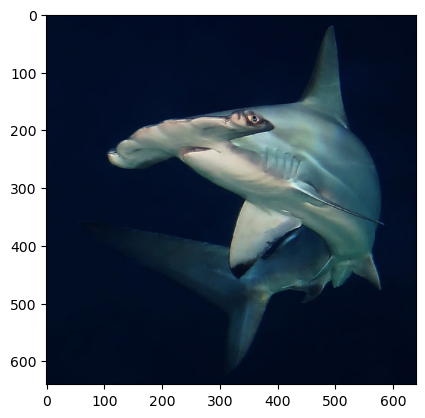

In [3]:
print(y)
print(len(y))
print(len(X))
plt.imshow(X[1500])

In [4]:
IMG_SIZE = 600

resize_and_rescale = keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255) # smaller size
])

for i in range(len(X)):
    X[i] = resize_and_rescale(X[i])

(600, 600, 3)
1581


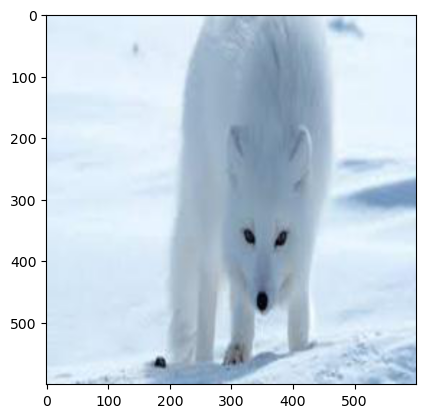

In [5]:
print(X[1].shape)
print(len(X))
plt.imshow(X[1])

In [6]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

In [7]:
def grayscale(original):
    gray_in=original[:,:,0]*0.3086+original[:,:,1]*0.6094+original[:,:,2]*0.0820
    return gray_in

In [8]:
#cell cam on
# print(X[1000].shape)
cc="dem"
# image =X[1000].numpy()
# print(image.dtype)
# plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
# for i in range(1000):
    # result=tf.image.flip_left_right(X[i])
    # result=result.numpy()
    # plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", result)

    # result=tf.image.flip_left_right(X[i])
    # image = result.numpy()
    # plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)

True

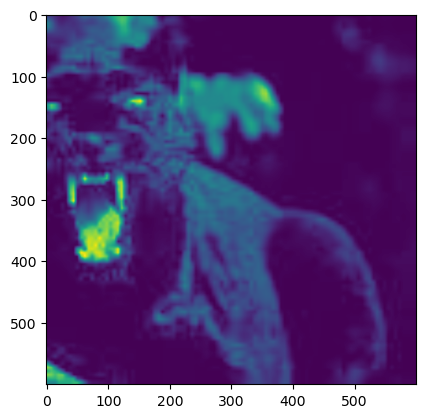

In [9]:
result=tf.image.rgb_to_grayscale(X[1000])
image = result.numpy()
image = (image * 255).astype('uint8')

plt.imshow(image)
cv2.imwrite(f"D:\\agumented\\{cc+str(1000)}.png", image)

In [10]:
dem=0
cc="dem"
epoch=0
destination_folder = 'D:\\agumented\\'
visu=[]
for i in range(len(X)*2):
    if dem>=0 and dem<100:
        if epoch==0:
            result=tf.image.flip_left_right(X[i])
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
        if epoch==1:
            j=i-1581
            seed = (i, 0)
            result=tf.image.stateless_random_brightness(X[j], max_delta=0.95, seed=seed)
            result = tf.clip_by_value(result, 0.0, 1.0)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
    elif dem>=100 and dem<200:
        if epoch==0:
            result=tf.image.rgb_to_grayscale(X[i])
            visu.append(result)
            image = result.numpy()
            image = (image * 255).astype('uint8')
            cv2.imwrite(f"D:\\agumented\\{cc+str(i)}.jpg", image)
        if epoch==1:
            j=i-1581
            result=tf.image.rot90(X[j])
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
    elif dem>=200 and dem<300:
        if epoch==0:
            result=tf.image.adjust_saturation(X[i],3)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
        if epoch==1:
            j=i-1581
            result=tf.image.adjust_brightness(X[j],0.5*2-1)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
    elif dem>=300 and dem<400:
        if epoch==0:
            result=tf.image.adjust_brightness(X[i],0.5*2-1)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
        if epoch==1:
            j=i-1581
            result=tf.image.central_crop(X[j], central_fraction=0.75)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
    elif dem>=400 and dem<500:
        if epoch==0:
            result=tf.image.central_crop(X[i], central_fraction=0.75)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
        if epoch==1:
            j=i-1581
            result=tf.image.adjust_saturation(X[j],3)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
    elif dem>=500 and dem<600:
        if epoch==0:
            result=tf.image.rot90(X[i])
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
        if epoch==1:
            j=i-1581
            result=tf.image.rgb_to_grayscale(X[j])
            visu.append(result)
            image = result.numpy()
            image = (image * 255).astype('uint8')
            cv2.imwrite(f"D:\\agumented\\{cc+str(i)}.jpg", image)
    else:
        if epoch==0:
            seed = (i, 0)  # tuple of size (2,)
            result=tf.image.stateless_random_brightness(X[i], max_delta=0.95, seed=seed)
            result = tf.clip_by_value(result, 0.0, 1.0)
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
        if epoch==1:
            j=i-1581
            result=tf.image.flip_left_right(X[j])
            visu.append(result)
            image = result.numpy()
            plt.imsave(f"D:\\agumented\\{cc+str(i)}.jpg", image)
            
    if i==len(X)-1:
        epoch+=1

    if epoch==2:
        break
    
    if dem==800:
        dem=0
        continue
    dem+=1

KeyboardInterrupt: 

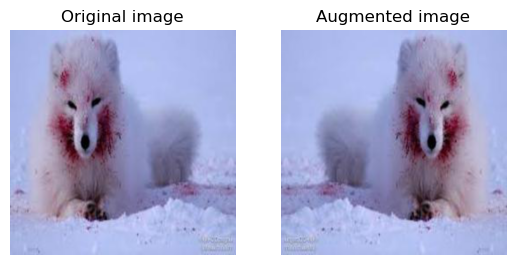

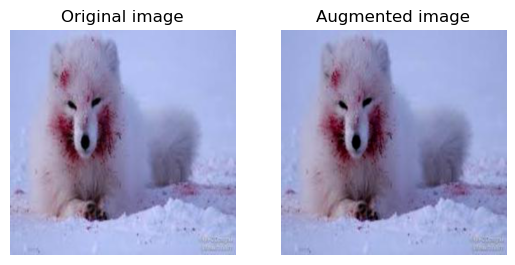

In [9]:
visualize(X[25], visu[25])
visualize(X[25], visu[1606])